In [6]:
#Import Clean data set from Data Cleaning notebook
import os
import pandas as pd
import numpy as np

os.chdir(r'C:\Users\nmur1\Google Drive\Springboard\Capstone 1\CleanData')

#Import my clean data from Notebook 1
df_Att = pd.read_csv('IPO Attributes.csv', index_col = 0)
df_pricing = pd.read_csv('DailyPricing.csv', index_col = 0)
df_Macro = pd.read_csv('MacroEcon.csv', index_col = 0)

os.chdir(r'C:\Users\nmur1\Google Drive\Springboard\Capstone 1\EDA')

In [7]:
#run a concat on the macro econ data and my attribute data
df = pd.merge(df_Att, df_Macro, on = 'FQ', how = 'left')

In [8]:
#drop date - I have the year, month, day split into separate columns

to_drop = [ 'ipoDate' ]
try:
    df.drop(columns = to_drop, inplace = True)
except:
    df = df
    


# Write Function to Compare Price Changes for Two given sets of Days

When I get further into analysis I'm going to want to compare the price changes between two given sets of days. The below function will take in 4 days and my pricing table created above. The output will create a dataframe giving me the percentage price change beteen Day1 and Day2 vs. percent change between Day3 and Day4

I.e. the below example I'm inputting 0 to 30 vs. 31 to 90

In [9]:
#Compare price changes based on 2 ranges

days = [0,260]

def PriceComp(days):

    Day1 = days[0]
    Day2 = days[1]
    Closing1 = df_pricing.loc[df_pricing['Trade Day']==Day1,['Symbol','C']].set_index('Symbol')
    Closing2 = df_pricing.loc[df_pricing['Trade Day']==Day2,['Symbol','C']].set_index('Symbol')
    #Closing3 = df_pricing.loc[df_pricing['Trade Day']==Day3,['Symbol','C']].set_index('Symbol')
    #Closing4 = df_pricing.loc[df_pricing['Trade Day']==Day4,['Symbol','C']].set_index('Symbol')

    Change1 = pd.merge(Closing1,Closing2, on = 'Symbol', how ='inner')
    Change1 = Change1.pct_change(axis = 'columns').drop('C_x', axis = 1)
    #Change2 = pd.merge(Closing3, Closing4, on = 'Symbol', how = 'inner')
    #Change2 = Change2.pct_change(axis = 'columns').drop('C_x', axis = 1)

    #Change_Comp = pd.merge(Change1, Change2, on='Symbol', how = 'inner')
    Change1.columns = [str(Day1) + ' to '+ str(Day2)]
    Change_Comp = Change1.apply(lambda x: x * 100)
    
    
    return Change_Comp



In [10]:
#add price points to main attribute table
#going to start with quarters and full year

compdays = [[0,65], [65,130], [130,195], [195, 260], [0,260], [0,30], [30,65]]

lists = []

for c in compdays:
    
    pricing = PriceComp(c)
    lists.append(pricing)
    


PricingTable = pd.concat(lists, axis = 1,  join = 'inner')

#export any missing prices
MissingPrices  = pd.merge(df, PricingTable, on = 'Symbol', how = 'left')
MissingPrices = MissingPrices[MissingPrices['0 to 65'].isnull()]['Symbol']
MissingPrices.to_excel('Missing_Prices.xls')

#get full df on inner join
Full_DF = pd.merge(df, PricingTable, on = 'Symbol', how = 'inner')


print('---------------Price Merge Analysis---------------------------------------------')
print('Original Dataframe:' + str(len(df)) + ' rows')
print(str(len(MissingPrices)) + ' tickers could not calculate pricing for the given ranges')
print('New Dataframe: ' + str(len(Full_DF)) + 'rows')


---------------Price Merge Analysis---------------------------------------------
Original Dataframe:2312 rows
297 tickers could not calculate pricing for the given ranges
New Dataframe: 2015rows


In [11]:
#inspect final set and dtypes
Full_DF.dtypes
Full_DF.describe().T


,count,mean,std,min,25%,50%,75%,max
Month,2015.0,6.601985,3.332664,1.000000,4.000000,6.000000,10.000000,12.000000
Day,2015.0,16.243176,9.027621,1.000000,9.000000,16.000000,24.000000,31.000000
Year,2015.0,2008.195533,6.506469,1996.000000,2003.000000,2010.000000,2014.000000,2017.000000
CEOAge,1909.0,55.470403,7.540651,26.000000,51.000000,56.000000,60.000000,84.000000
Revenue_M,2015.0,2341.941663,9311.835597,-3.250000,65.555000,337.670000,1410.000000,177870.000000
Income_M,2015.0,158.635082,1049.742231,-3450.000000,-20.280000,11.010000,111.150000,30100.000000
AgeatIPO,1987.0,14.827881,51.373184,-17.000000,1.000000,6.000000,14.000000,2000.000000
GDP,2015.0,15291.965484,1982.623274,10817.896000,14145.645000,15750.625000,16841.475000,18021.048000
GDP Growh,2015.0,0.026337,0.013582,-0.039244,0.017215,0.026011,0.035055,0.052977
FEDFUNDS,2015.0,1.959993,2.316555,0.073333,0.110000,0.373333,4.860000,6.520000


# Fix Employee Age and Age at IPO Fields

In [12]:
#realized employees was an object type do to '-' values instead of zeros, vised and converted that
Full_DF.employees.value_counts()
Full_DF.employees = Full_DF.employees.replace('-',0).astype('int64')

#Age at IPO has a negative value. Change to zero. Age at IPO calculates the year of the IPO less the year founded so 
#has to be mistake if 0
#2000 must be off too

def fix_age(x):
    if x < 0:
        x =0
    elif x >500:
        x = 0
    else:
        x = x
    
    return x


Full_DF['AgeatIPO'].value_counts().to_clipboard()
Full_DF.AgeatIPO = Full_DF['AgeatIPO'].apply(fix_age)
Full_DF.AgeatIPO.describe()

count    1987.000000
mean       13.981379
std        25.460732
min         0.000000
25%         1.000000
50%         6.000000
75%        14.000000
max       186.000000
Name: AgeatIPO, dtype: float64

In [13]:
#convert month, day, and year to objects. These will be used as categorical variables not numbers
Full_DF.Month = Full_DF.Month.astype('object')
Full_DF.Day = Full_DF.Day.astype('object')
Full_DF.Year = Full_DF.Year.astype('object')
Full_DF.describe().T
Full_DF.dtypes.to_clipboard()

## Run Box Plots

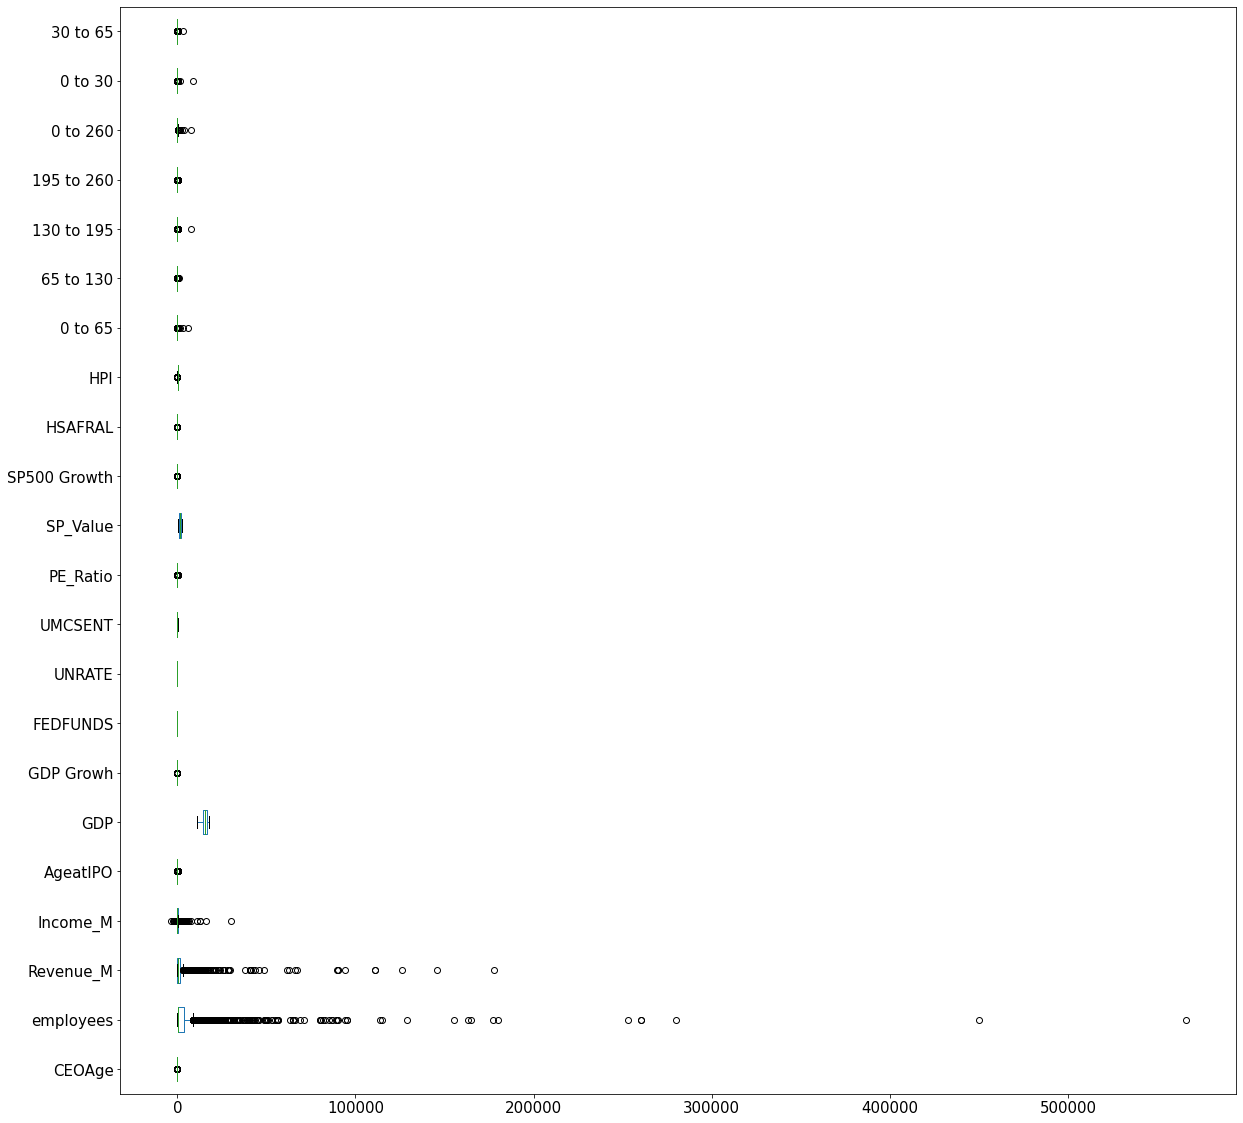

In [14]:
boxplot = Full_DF.boxplot(grid = False, vert = False, fontsize = 15, figsize = (20,20))


In [15]:
#this function allows me to inspect outlier summary stats before actually removing them
#After my initial analysis I found that Age at IPO, GDP Growth, and 

def Outlier_Summary(df):
    
    lstoutlier = []
    #create dataframe with only numbers
    NuDF = df.select_dtypes(include=['int64', 'float64'])
   
    for col in NuDF:
    
    
        df1 = NuDF[[col]]
         #get first quartile
        Q1 = df1.quantile(.25)

        #get second quartile 
        Q3 = df1.quantile(.75)
    
        # Now calculate the IQR, storing it in a variable called IQR.
        IQR = Q3 - Q1
    
        #filter outliers
        outliers = df1[((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR)))]
        cnt = pd.DataFrame(outliers[outliers[col].notnull()].count())
        cnt.columns = ['Outliers']
        
        
        
        #outliers = pd.melt(outliers, var_name = 'Field')
        cnt['IQR'] = NuDF[col].quantile(.75) - NuDF[col].quantile(.25)
        cnt['Mean'] = NuDF[col].mean()
        cnt['PercentOutlier'] = cnt.Outliers/len(df) * 100
        lstoutlier.append(cnt)
        
        
    return  pd.concat(lstoutlier)
                    
    #dfOutlier = pd.DataFrame(lstoutlier)
test = Outlier_Summary(Full_DF)

test

,Outliers,IQR,Mean,PercentOutlier
CEOAge,50,9.000000,55.470403,2.481390
employees,277,3462.500000,6171.215881,13.746898
Revenue_M,268,1344.445000,2341.941663,13.300248
Income_M,287,131.430000,158.635082,14.243176
AgeatIPO,206,13.000000,13.981379,10.223325
GDP,0,2695.830000,15291.965484,0.000000
GDP Growh,29,0.017840,0.026337,1.439206
FEDFUNDS,0,4.750000,1.959993,0.000000
UNRATE,0,2.466667,6.080116,0.000000
UMCSENT,0,16.733333,87.235269,0.000000


## employees, Revenue, Income, and Ageat IPO have too many outliers to any valuable insight remove them below

In [16]:
#remove employee, revenue, and income
todrop = ['employees', 'Revenue_M', 'Income_M', 'AgeatIPO']

for d in todrop:
    try:
        Full_DF.drop(columns = d, inplace = True)
    except:
        Full_DF = Full_DF
        


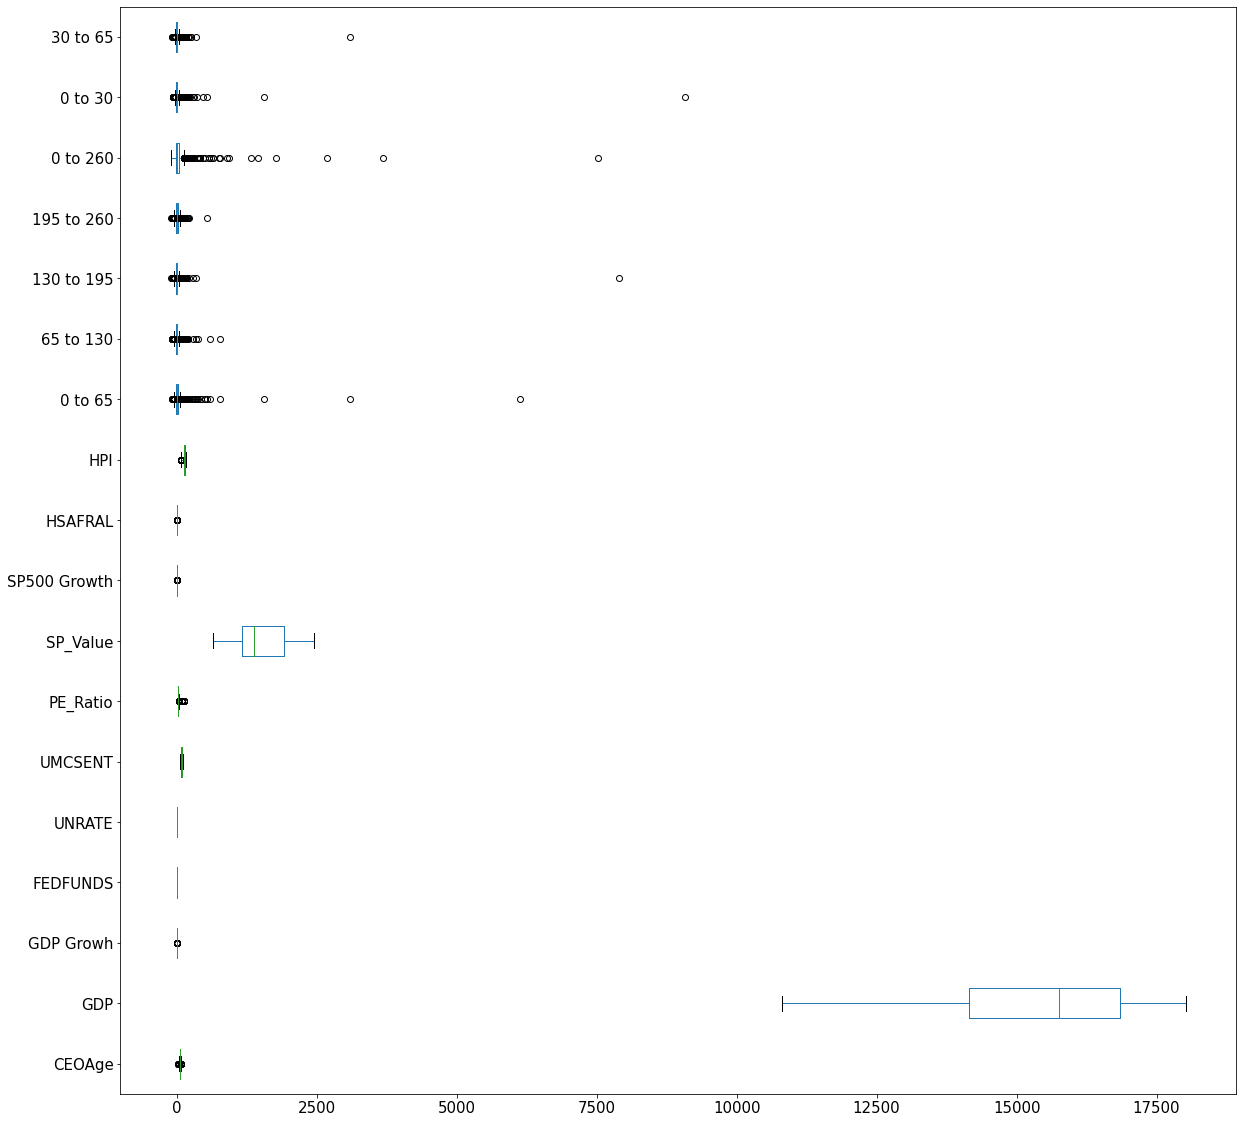

In [17]:
boxplot = Full_DF.boxplot(grid = False, vert = False, fontsize = 15, figsize = (20,20))

In [18]:
def Remove_Outlier(df):
    
    Q1 = df.quantile(.25)
    Q3 = df.quantile(.75)

    IQR = Q3 - Q1
    dfno = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
    
    removed = df[((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
    
    #return dfno
    print("Outliers removed: " + str(len(removed)))
    print("Percentage removed: " + str(len(removed)/len(df)))
    print("New Count: " + str(len(dfno)))
    return dfno
    
dfno = Remove_Outlier(Full_DF)

Outliers removed: 799
Percentage removed: 0.3965260545905707
New Count: 1216


### employees, revenue, and income have a wide variation of values with a lot of outliers. May need to scrap these from the final modeling set


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#make a seaborn graph based on value counts of a given categorical variable

def catplots(df, field):

    f, ax = plt.subplots(figsize=(10, 10))
    # In the following brackets, we want the value_counts() of the states 
    x = pd.DataFrame(df[field].value_counts())
    
    # Get the state names by calling list() on the x.index
    #value counts returns a data frame with the state as the index and the counts as the values
    #need to convert the names and values into two separate lists to properly plot in seaborn
    names = list(x.index)

    # Get the values by plugging x.state into the list() function
    values = list(x[field])

    # We're now going to call the barplot() method on our sns seaborn object. 
    # If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
    return sns.barplot(x=values, y=names, palette="RdBu_r")




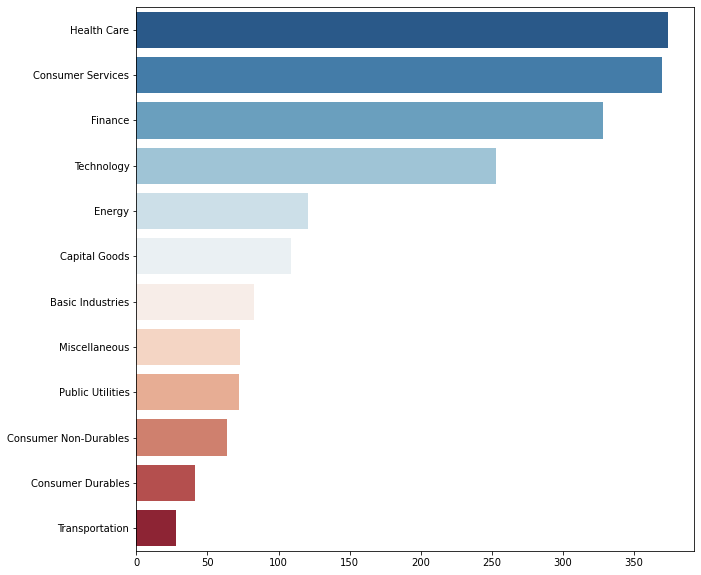

In [31]:
Sector = catplots(Full_DF, 'Sector')

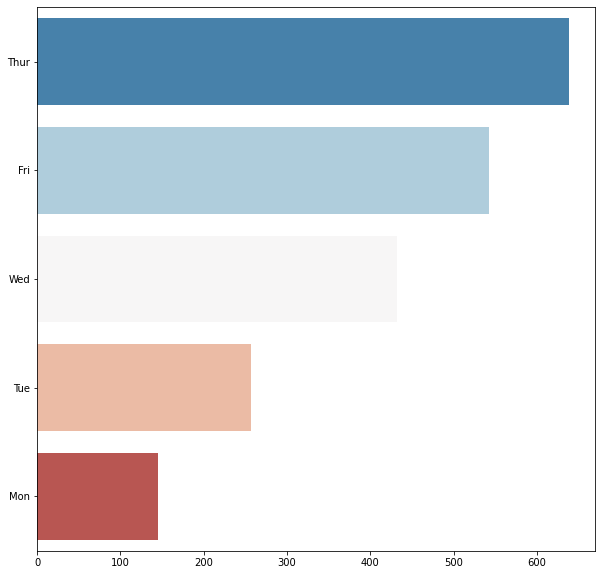

In [20]:
DayofWeek = catplots(Full_DF, 'DayofWeek')

In [21]:
Industries = Full_DF.Industry.value_counts() / len(Full_DF) * 100
Industries

Major Pharmaceuticals                      10.124069
Real Estate Investment Trusts               5.856079
Major Banks                                 5.707196
Computer Software: Prepackaged Software     3.672457
Business Services                           3.622829
                                             ...    
Other Pharmaceuticals                       0.049628
Precision Instruments                       0.049628
Tobacco                                     0.049628
Electronics Distribution                    0.049628
Books                                       0.049628
Name: Industry, Length: 126, dtype: float64

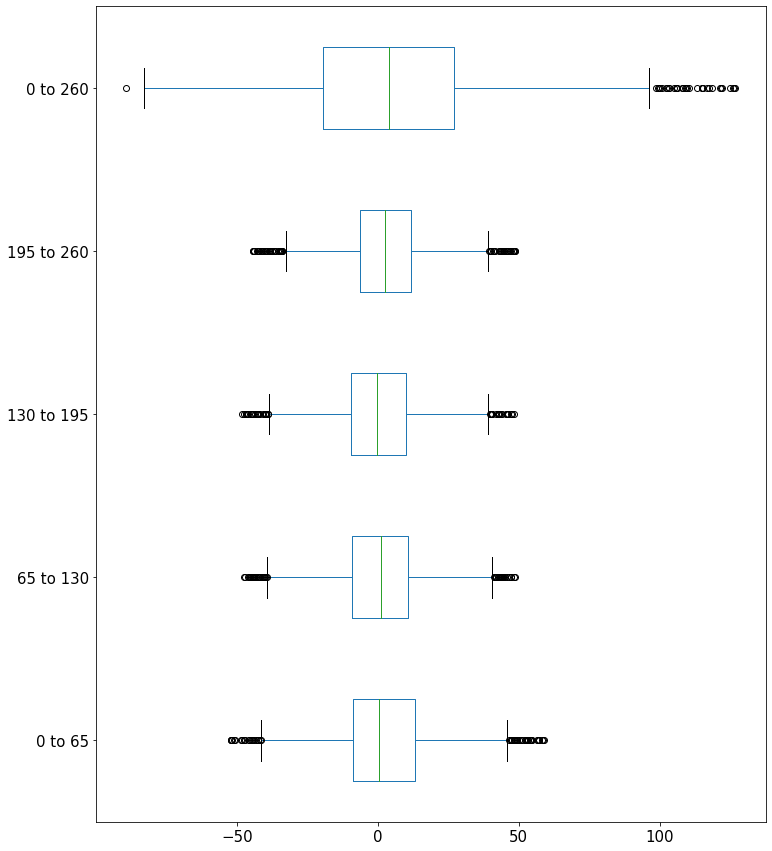

In [45]:
dfno.iloc[:,-5:].boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))


In [22]:
#Calculate the correlation coefficients
corr = dfno.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,CEOAge,GDP,GDP Growh,FEDFUNDS,UNRATE,UMCSENT,PE_Ratio,SP_Value,SP500 Growth,HSAFRAL,HPI,0 to 65,65 to 130,130 to 195,195 to 260,0 to 260,0 to 30,30 to 65
CEOAge,1.000000,-0.100000,0.030000,0.110000,-0.010000,0.020000,0.040000,-0.090000,0.030000,0.010000,-0.080000,0.010000,-0.020000,-0.030000,0.010000,-0.010000,0.020000,0.000000
GDP,-0.100000,1.000000,-0.620000,-0.760000,0.160000,-0.350000,-0.180000,0.870000,-0.300000,0.180000,0.890000,-0.030000,-0.060000,-0.010000,0.010000,-0.040000,-0.000000,-0.050000
GDP Growh,0.030000,-0.620000,1.000000,0.540000,-0.510000,0.690000,0.290000,-0.340000,0.030000,-0.550000,-0.560000,-0.000000,-0.000000,-0.010000,-0.020000,-0.010000,0.000000,-0.010000
FEDFUNDS,0.110000,-0.760000,0.540000,1.000000,-0.590000,0.560000,0.270000,-0.540000,0.030000,-0.530000,-0.490000,0.010000,0.020000,-0.050000,-0.060000,-0.030000,-0.010000,0.020000
UNRATE,-0.010000,0.160000,-0.510000,-0.590000,1.000000,-0.860000,-0.520000,-0.210000,0.320000,0.910000,-0.080000,0.010000,0.030000,0.050000,0.080000,0.070000,-0.000000,0.020000
UMCSENT,0.020000,-0.350000,0.690000,0.560000,-0.860000,1.000000,0.670000,0.070000,-0.100000,-0.840000,-0.230000,-0.010000,-0.050000,-0.030000,-0.050000,-0.060000,0.000000,-0.010000
PE_Ratio,0.040000,-0.180000,0.290000,0.270000,-0.520000,0.670000,1.000000,0.150000,0.010000,-0.490000,-0.150000,-0.050000,-0.050000,0.000000,-0.030000,-0.060000,-0.040000,-0.030000
SP_Value,-0.090000,0.870000,-0.340000,-0.540000,-0.210000,0.070000,0.150000,1.000000,-0.250000,-0.200000,0.740000,-0.030000,-0.100000,-0.020000,-0.030000,-0.080000,-0.000000,-0.040000
SP500 Growth,0.030000,-0.300000,0.030000,0.030000,0.320000,-0.100000,0.010000,-0.250000,1.000000,0.290000,-0.350000,0.040000,-0.030000,0.060000,0.010000,0.040000,0.010000,0.060000
HSAFRAL,0.010000,0.180000,-0.550000,-0.530000,0.910000,-0.840000,-0.490000,-0.200000,0.290000,1.000000,-0.120000,-0.050000,0.020000,-0.010000,0.060000,-0.010000,-0.030000,-0.040000


In [23]:
# Drop my response variable - for now I"m trying to predict full year pricing or days 0 to 260
corr_matrix= dfno.drop(['0 to 260'], axis=1).corr().abs()

#Get the upper triangle of my matris
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#get variables to drop
to_drop = [column for column in upper.columns if any(upper[column] >.95)]
upper


,CEOAge,GDP,GDP Growh,FEDFUNDS,UNRATE,UMCSENT,PE_Ratio,SP_Value,SP500 Growth,HSAFRAL,HPI,0 to 65,65 to 130,130 to 195,195 to 260,0 to 30,30 to 65
CEOAge,NaN,0.101137,0.026636,0.111145,0.006592,0.018254,0.037177,0.093849,0.030076,0.013907,0.076477,0.014851,0.015967,0.025889,0.009437,0.022065,0.001100
GDP,NaN,NaN,0.624470,0.763086,0.157275,0.351868,0.175427,0.865052,0.301466,0.176782,0.893780,0.032875,0.058137,0.007825,0.012880,0.000565,0.047695
GDP Growh,NaN,NaN,NaN,0.541950,0.514096,0.685067,0.290980,0.344546,0.033235,0.549357,0.555581,0.004456,0.003310,0.005701,0.023772,0.004766,0.008217
FEDFUNDS,NaN,NaN,NaN,NaN,0.588542,0.558102,0.267559,0.544260,0.028139,0.527235,0.492712,0.011420,0.017723,0.052034,0.062973,0.008006,0.024089
UNRATE,NaN,NaN,NaN,NaN,NaN,0.862654,0.519444,0.214400,0.316380,0.908316,0.075403,0.012735,0.028554,0.045253,0.084046,0.004445,0.017095
UMCSENT,NaN,NaN,NaN,NaN,NaN,NaN,0.666895,0.073035,0.101342,0.835193,0.227215,0.006551,0.048396,0.033591,0.049856,0.004077,0.009079
PE_Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151736,0.010988,0.491745,0.152031,0.047330,0.049107,0.002117,0.030380,0.038251,0.028570
SP_Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.248586,0.203193,0.742491,0.033924,0.096712,0.019632,0.027191,0.003839,0.042161
SP500 Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.289141,0.345564,0.044583,0.033310,0.063203,0.005411,0.006942,0.059466
HSAFRAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.123539,0.047925,0.017819,0.011686,0.061445,0.031789,0.042739


In [24]:
#Lets see what we have to drop, nothing
print(to_drop)

[]


In [25]:
os.chdir(r'C:\Users\nmur1\Google Drive\Springboard\Capstone 1\CleanData')

dfno.to_csv('modeling.csv')

In [26]:
dfno

,Symbol,Month,Day,Year,CEOGender,Industry,Sector,CEOAge,DayofWeek,FQ,...,SP500 Growth,HSAFRAL,HPI,0 to 65,65 to 130,130 to 195,195 to 260,0 to 260,0 to 30,30 to 65
6,ABBV,12,10,2012,male,Major Pharmaceuticals,Health Care,63.0,Mon,4_2012,...,0.138261,3.974684,132.634628,7.628571,16.591452,1.161202,15.259959,46.314286,6.628571,0.937835
7,ABCD,12,9,2009,male,Publishing,Consumer Services,54.0,Wed,4_2009,...,0.298066,7.538902,135.592348,-0.273973,21.153846,-31.519274,5.629139,-12.602740,10.410959,-9.677419
9,ABR,4,7,2004,male,Real Estate Investment Trusts,Consumer Services,54.0,Wed,2_2004,...,0.114162,1.608893,128.698514,-2.000000,9.507218,8.636364,6.694561,24.390244,-7.219512,5.625657
11,AC,11,9,2015,male,Investment Bankers/Brokers/Service,Finance,62.0,Mon,4_2015,...,-0.054029,2.808642,154.288962,-0.423077,16.879104,2.643754,8.982614,30.192308,19.538462,-16.698842
12,ACAD,5,27,2004,male,Major Pharmaceuticals,Health Care,56.0,Thur,2_2004,...,0.114162,1.608893,128.698514,-11.343284,12.457912,13.922156,11.957950,27.164179,-9.402985,-2.141680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,ZAIS,3,22,2013,male,Investment Managers,Finance,58.0,Fri,1_2013,...,0.132910,3.713317,134.820918,0.898204,0.395648,0.295567,0.687623,2.295409,0.998004,-0.098814
2002,ZAYO,10,17,2014,male,Telecommunications Equipment,Public Utilities,54.0,Fri,4_2014,...,0.112941,3.490734,147.010093,35.863636,-7.561057,-9.880565,1.164659,14.500000,24.954545,8.730447
2006,ZG,7,20,2011,male,Business Services,Miscellaneous,41.0,Wed,3_2011,...,0.030420,6.770610,127.864208,-25.440105,4.124859,29.023302,20.207145,20.408779,3.941862,-28.267693
2010,ZOES,4,11,2014,male,Restaurants,Consumer Services,49.0,Fri,2_2014,...,0.182432,3.918724,144.271209,19.538835,7.140440,2.084649,5.476485,37.904531,16.626214,2.497399
